# Data Cleaning: Airbnb Listings

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [2]:
cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

data = pd.read_csv('listings.csv', usecols=cols)

In [3]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$160.00,3,21,62,86.0,1
1,1846722,2631556,NaN,Apartment,Entire home/apt,10,1.0,3.0,3.0,Real Bed,$105.00,1,28,22,85.0,2
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,$58.00,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$185.00,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,$195.00,1,30,1,100.0,1


In [4]:
len(data['zipcode'][data.zipcode.isnull()]) #null count
#data.info() #total detail 
#check the number of missing values in each individua column
#for col in data.columns:
#    print (col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))
data.isnull().sum() #good method

id                         0
host_id                    0
zipcode                  162
property_type              6
room_type                  0
accommodates               0
bathrooms                463
bedrooms                 140
beds                      98
bed_type                   0
price                      0
minimum_nights             0
availability_30            0
number_of_reviews          0
review_scores_rating    8657
host_listing_count         0
dtype: int64

### 1. Remove NaN values from dataframe except review_scores_rating

In [5]:
original = len(data)
data = data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
print('Number of Nan values removed:', original - len(data))

Number of Nan values removed: 769


### 2. Convert formatting for price from $1.00 into a float of 1.00

In [6]:
data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

### 3. Drop any invalid values

In [7]:
print ('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print ('Number of Beds 0:', len(data[data['beds'] == 0]))
print ('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

Number of Accommodates 0: 0
Number of Bedrooms 0: 2321
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


### 4. Convert Zipcode to 5 digits

In [8]:
data.zipcode = data['zipcode'].str.replace(r'-\d+', '')

### 5. Let's explore distribution of accommodates

In [9]:
print('Number of Unique Accomodation: ', np.unique(data['accommodates']))
for i in range(0, 16):
    print('Accommodation {}:'.format(i+1), len(data[data.accommodates == i+1]))
data.groupby(['accommodates']).agg('count')['id']
data.accommodates.value_counts().reset_index().sort_values(by=['index'])

Number of Unique Accomodation:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Accommodation 1: 2643
Accommodation 2: 11400
Accommodation 3: 2909
Accommodation 4: 4278
Accommodation 5: 982
Accommodation 6: 1214
Accommodation 7: 217
Accommodation 8: 333
Accommodation 9: 57
Accommodation 10: 119
Accommodation 11: 15
Accommodation 12: 43
Accommodation 13: 4
Accommodation 14: 14
Accommodation 15: 5
Accommodation 16: 69


,index,accommodates
3,1,2643
0,2,11400
2,3,2909
1,4,4278
5,5,982
4,6,1214
7,7,217
6,8,333
10,9,57
8,10,119


### 6. Visualize distribution of price, accommdations, beds, and review_scores_rating respectively

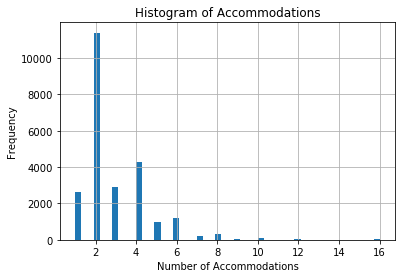

In [10]:
plt.hist(data.accommodates, bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [11]:
# explore distribution of beds
print('Number of Unique Beds: ', np.unique(data['beds']))
for i in range(1, 17):
    print('Beds {}:'.format(i), len(data[data['beds'] == i]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16.]
Beds 1: 16002
Beds 2: 5418
Beds 3: 1770
Beds 4: 610
Beds 5: 243
Beds 6: 117
Beds 7: 41
Beds 8: 22
Beds 9: 3
Beds 10: 20
Beds 11: 4
Beds 12: 9
Beds 13: 1
Beds 14: 15
Beds 15: 0
Beds 16: 27


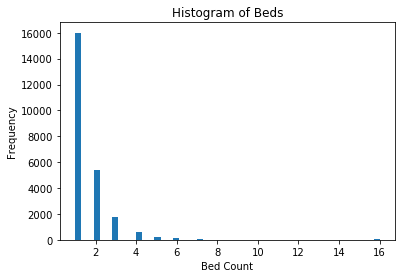

In [17]:
# Visualize the distribution of beds
plt.hist(data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

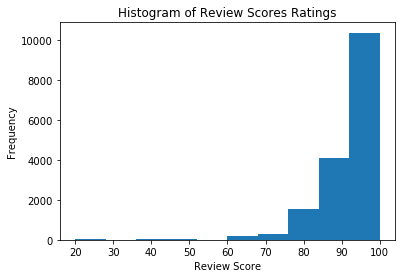

In [26]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

### 7. Convert NaN scores with 0 reviews into 'No Reviews'

In [80]:
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist() #index->array->list
idx_vals
data.loc[idx_vals, 'review_scores_rating'] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace(np.nan, 'No Reviews')

In [87]:
# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]

In [100]:
len(data)
data = data[data.zipcode.map(len) == 5]

In [106]:
len(data)
data = data[data['zipcode'].apply(len) == 5]

### 8. Convert review_scores_rating into different buckets

In [108]:
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

In [110]:
data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print('Unique Values in the Column:', np.unique(data['review_scores_rating']))

Unique Values in the Column: ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94'
 '95-100' 'No Reviews']


In [111]:
data['review_scores_rating']

0         85-89
2        95-100
3        95-100
4        95-100
5        95-100
          ...  
27386    95-100
27388    95-100
27389     90-94
27390    95-100
27391     90-94
Name: review_scores_rating, Length: 24050, dtype: object

### 9. Encode categorical variables

In [124]:
property_dummies = pd.get_dummies(data['property_type'])
room_dummies = pd.get_dummies(data['room_type'])
bed_dummies = pd.get_dummies(data['bed_type'])

### 10. Replace the old columns with our new one-hot encoded ones

In [135]:
df = pd.concat((data.drop(['property_type', 'room_type', 'bed_type'], axis=1), \
     property_dummies.astype(int), room_dummies.astype(int), bed_dummies.astype(int)), \
     axis=1)

print('Number of Columns:', len(df.columns))

Number of Columns: 39


### 11. Move target predictor 'price' to the start of the dataframe

In [180]:
cols = list(df.columns.values)
idx = cols.index('price')
rearrange_cols = [cols[idx]] + cols[:idx] + cols[idx+1:]
df = df[rearrange_cols]

### 12. Convert non-categorical variables to floats and normalize

In [184]:
def normalize(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listing_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = normalize(df[col])

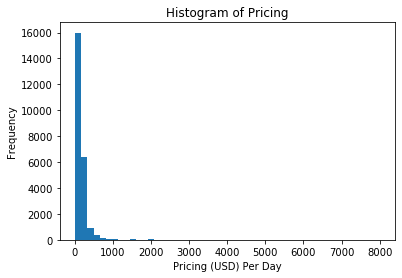

In [191]:
# visualize distribution of price (target variable)
plt.hist(df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

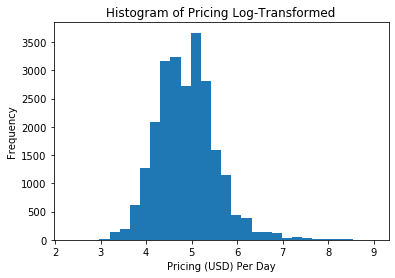

In [192]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

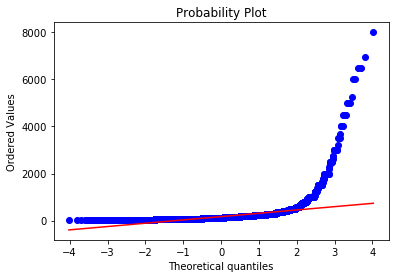

In [197]:
# qq plot for log-transformed pricing
stats.probplot(df['price'], dist="norm", plot=pylab)
pylab.show()

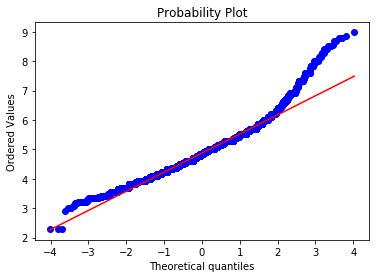

In [198]:
# qq plot for log-transformed pricing
stats.probplot(df['price_log'], dist="norm", plot=pylab)
pylab.show()